<a href="https://colab.research.google.com/github/vedashnii/ACCFB-Cost-per-Pickup-and-Pound/blob/main/CA_SB_1383_Food_Recovery_Cost_per_Pickup_%26_Pound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Food Recovery Cost per Pickup & Pound**
This Notebook contains skeleton code for calculating Food Recovery Costs for the operations designated in CA Senate Bill 1383.


####Data Needed:
 - The distance covered (miles, round trip from organization facility)
 - Type of vehicle (to calculate fuel efficiency (1/MPG))
 - Estimated gas prices ($)
 - The amount of food transported (lbs)

#**Setup and Data Cleaning**

##**Import Basic Packages & Files**

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
drive.mount('/content/drive')
shared_drive = '/content/drive/My Drive/ACCFB/ACCFB Data'
print(os.listdir(shared_drive))

Mounted at /content/drive
['2024 FRP Agency Survey Results.xlsx', '2023 FRP Agency Survey Results.xlsx', '2022 FRP Agency Survey Results.xlsx', 'Email about data.gdoc', '[SECOND EMAIL] FY25 FRP Lbs vs Warehouse.xlsx', 'vehicles.csv', 'Survey Responses for UCB.xlsx', 'Agency Schedules AND LOCATIONS for UCB Project-2025-11-04-16-12-19.xlsx', 'ACCFB Pickup Data.ipynb', 'Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx', 'vehicles.gsheet', '(with addresses) Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx', 'Agency Vehicles.gsheet', 'Agency Vehicles.xlsx', 'Copy of 2024 FRP Agency Survey Results.xlsx', 'UCB FRP Agency Report-2025-10-08-12-11-58.xlsx', 'ACCFB Cost per Pickup & Pound (Final).ipynb']


##**Select Primary Sheet**
From a personal or shared Google Drive

In [2]:
def find_paths(root, name_substring):
    hits = []
    for r, d, f in os.walk(root):
        for nm in d + f:
            if name_substring.lower() in nm.lower():
                hits.append(os.path.join(r, nm))
    return hits

# Search across My Drive and Shared drives
hits = []
# hits += find_paths('/content/drive/My Drive', 'ACCFB')
hits += find_paths('/content/drive/Shared drives', 'ACCFB')
for p in hits:
    print(p)

In [3]:
# Imports excel sheet and drops columns and rows that are not part of data
excel_path = '/content/drive/My Drive/ACCFB/ACCFB Data/(with addresses) Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx'
df = pd.read_excel(excel_path, sheet_name='Pickup Data for UCB _11.6', header = 12)
print(df.shape)
print(df.head())

(3548, 15)
   Unnamed: 0                        Agency: Account Name  ↑  \
0         NaN  CrossStreets Neighborhood Services: Creekside   
1         NaN                                            NaN   
2         NaN                                            NaN   
3         NaN                                            NaN   
4         NaN                                            NaN   

                              Agency Address                  Food Donor  ↑  \
0  951 MacArthur Blvd, San Leandro, CA 94577  Castro Valley Natural Grocery   
1                                        NaN           Costco - Store #1341   
2                                        NaN          Safeway - Store #0971   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

                                FRP Donor Address  ↑ Unnamed: 5 Session Date  \
0  3295 Castro Valley Boulevard Castro Valley, CA

####**Fill Empty Rows with Correct Values**

In [4]:
# Forward-fill specific columns by name
cols_to_ffill = [
    'Agency: Account Name  ↑',
    'Food Donor  ↑',
    'FRP Donor Address  ↑',
    'Agency Address'
]
df[cols_to_ffill] = df[cols_to_ffill].ffill()
display(df.head())
print(df.shape)

,Unnamed: 0,Agency: Account Name ↑,Agency Address,Food Donor ↑,FRP Donor Address ↑,Unnamed: 5,Session Date,Total Quantity,Agency: Billing Address Line 1,Agency: Primary City (Billing City),Agency: Primary Zip/Postal Code (Billing Zip/Postal Code),Service Session: Service Session Name,Service Session: ID,Agency: Account ID,Agency: CERES ID
0,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",NaN,11/29/2024,75.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-29: CrossStreets Neighborhood Services...,a2FRl000001kqRF,0014x000018GvjL,A1515
1,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",NaN,12/27/2024,1220.0,951 MacArthur Blvd,San Leandro,94577.0,2024-12-27: CrossStreets Neighborhood Services...,a2FRl0000027Z6L,0014x000018GvjL,A1515
2,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/1/2024,88.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-01: CrossStreets Neighborhood Services...,a2F4x000001jT8Y,0014x000018GvjL,A1515
3,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/5/2024,219.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-05: CrossStreets Neighborhood Services...,a2F4x000001jT8Z,0014x000018GvjL,A1515
4,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/7/2024,258.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-07: CrossStreets Neighborhood Services...,a2F4x000001jT8b,0014x000018GvjL,A1515


(3548, 15)


##**Install GoogleMaps and Insert API Key**
Generate a Google Maps API and enable the [Distance Matrix API](console.cloud.google.com/google/maps-apis/api-list).

In [5]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=d01d3e520bff81cb692bdd729627bddc6356a9face09b967e35360fa5565d3d3
  Stored in directory: /root/.cache/pip/wheels/4c/6a/a7/bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps


In [6]:
import googlemaps
from google.colab import userdata
API_KEY = userdata.get('PlacesAPI')
gmaps = googlemaps.Client(key=API_KEY)

##**Select Neccessary Columns & Filter for Unique Routes**

In [7]:
df.columns = df.columns.str.replace('\s+', ' ', regex=True).str.strip()

# After cleaning, column names should now have a single space before '↑'.
# Adjust selection and mapping accordingly.
columns_to_select = ['Agency: Account Name ↑', 'Agency Address', 'Food Donor ↑', 'FRP Donor Address ↑', 'Total Quantity']
driving_dat = df[columns_to_select].drop_duplicates(subset=['Agency: Account Name ↑', 'FRP Donor Address ↑']).iloc[:-3]

driving_data_columns = {
    'Agency: Account Name ↑': 'Agency',
    'Food Donor ↑': 'Food Donor',
    'FRP Donor Address ↑': 'Donor Address',
    'Total Quantity': 'Total Quantity (lbs)'
}

driving_data = driving_dat.rename(columns=driving_data_columns)
display(driving_data)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2492722040.py:1: SyntaxWarning: invalid escape sequence '\s'
  df.columns = df.columns.str.replace('\s+', ' ', regex=True).str.strip()


,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0
206,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538",568.0
207,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Seafood City,"24536 Hesperian Blvd Hayward, CA 94545",149.0
...,...,...,...,...,...
3343,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538",435.0
3344,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Safeway - Store #1224,"5877 Jarvis Ave Newark, CA 94560-1251",200.0
3395,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Sprouts Farmers Market - Store #424,"6399 Jarvis Avenue Newark, CA 94560",290.0
3448,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Trader Joe's - Store #077,"39324 Argonaut Way Fremont, CA 94538",900.0


#**Calculate Driving Distance and Duration**
1. Define a function to get Driving Distance and Duration from two addresses
2. Apply the function to the Agency and Food Donor Address colummns

In [8]:
#Function to get Driving Distance and Duration between two addresses using the Distance Matrix API from Google Maps
## Takes 2 arguments: starting address, ending address
### Returns Driving Distance (meters) and Driving Duration (seconds)

def get_distance_duration(origin_address, destination_address):
    try:
        response = gmaps.distance_matrix(origin_address, destination_address, mode='driving')
        if response['status'] == 'OK' and response['rows'][0]['elements'][0]['status'] == 'OK':
            distance_meters = response['rows'][0]['elements'][0]['distance']['value']
            duration_seconds = response['rows'][0]['elements'][0]['duration']['value']
            return distance_meters, duration_seconds
        else:
            print(f"API response not OK or no route found for {origin_address} to {destination_address}. Status: {response['rows'][0]['elements'][0]['status'] if response['rows'][0]['elements'][0] else 'No Elements'}")
            return None, None
    except Exception as e:
        print(f"Error calling Google Maps API for {origin_address} to {destination_address}: {e}")
        return None, None

print("Defined get_distance_duration function.")

Defined get_distance_duration function.


In [9]:
distances = []
durations = []

for index, row in driving_data.iterrows():
    origin = row['Agency Address']
    destination = row['Donor Address']
    distance_meters, duration_seconds = get_distance_duration(origin, destination)
    distances.append(distance_meters)
    durations.append(duration_seconds)

driving_data['Driving Distance (meters)'] = distances
driving_data['Driving Duration (seconds)'] = durations

#  Multiply by 2 for round trip, Convert distance from meters to miles (1 meter = 0.000621371 miles)
driving_data['Driving Distance (miles)'] = (driving_data['Driving Distance (meters)'] *2) * 0.000621371
# Multiply by 2 for round trip, Convert duration from seconds to minutes
driving_data['Driving Duration (minutes)'] = (driving_data['Driving Duration (seconds)'] * 2) / 60

driving_data.drop(columns=['Driving Distance (meters)', 'Driving Duration (seconds)'], inplace=True)

In [10]:
display(driving_data.head())
print(driving_data.shape)

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000
206,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538",568.0,59.846726,63.966667
207,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Seafood City,"24536 Hesperian Blvd Hayward, CA 94545",149.0,20.214441,29.966667


(71, 7)


##**Add all Pickups Back**
This cell will match all rows to their pickup distances and durations for each route.

In [11]:
# Select relevant columns from df, using corrected column names (single space before ↑)
# and the Total Quantity column. Apply .iloc[:-3] to exclude the last 3 rows.
columns_to_select_for_costs = [
    'Agency: Account Name ↑',
    'Agency Address',
    'Food Donor ↑',
    'FRP Donor Address ↑',
    'Total Quantity'
]
costs = df[columns_to_select_for_costs].iloc[:-3]

# Use the same renaming dictionary as before to standardize column names in 'costs'
# for consistency with 'driving_data' and clearer merging.
costs = costs.rename(columns=driving_data_columns)

# Define the columns to merge on. These columns are common identifiers for a route
# and exist in both 'costs' and 'driving_data'. By merging on these, they won't get _x or _y suffixes.
merge_on_cols = ['Agency', 'Agency Address', 'Food Donor', 'Donor Address']

# Perform the merge.
# 'Total Quantity (lbs)' is present in both `costs` (left) and `driving_data` (right)
# and is NOT in `merge_on_cols`. Thus, it will result in `Total Quantity (lbs)_x` and `Total Quantity (lbs)_y`.
# We want to keep the one from `costs` (left), which is `Total Quantity (lbs)_x`, as it represents individual pickup quantity.
costs = pd.merge(costs, driving_data, on=merge_on_cols, how='left')

# Drop the 'Total Quantity (lbs)_y' column and rename 'Total Quantity (lbs)_x'
if 'Total Quantity (lbs)_y' in costs.columns:
    costs.drop(columns=['Total Quantity (lbs)_y'], inplace=True)
if 'Total Quantity (lbs)_x' in costs.columns:
    costs.rename(columns={'Total Quantity (lbs)_x': 'Total Quantity (lbs)'}, inplace=True)

# The 'Cost Per Pickup ($)' column is added later, so this check won't trigger at this stage.
# Keeping it for robustness if the notebook structure changes later.
if 'Cost Per Pickup' in costs.columns:
    costs.drop(columns=['Cost Per Pickup'], inplace=True)

display(costs.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000


##**Calculating Cost-Per-Pickup: Variables & Function**

###**Mileage Cost for Multiple Vehicle Types based off Weight**
Use this cell for estimating vehicle type by weightage.
#
**Do not run the next cell if using this method.**

In [17]:
#Cost per Pickup Function
##Takes Driving Distance (miles) as an Argument
gas = 4.85 ##Insert your own local gas price
def costperpick(miles, pounds):
  if pounds < 500:
    sedan_cost = miles * (1/33) * gas
    return sedan_cost
  if pounds < 700:
    suv_cost = miles * (1/26) * gas
    return suv_cost
  if pounds < 1000:
    truck_cost = miles * (1/23) * gas
    return truck_cost
  else:
    large_truck_cost = miles * (1/20) * gas
    return large_truck_cost

###**Mileage Cost for One Vehicle Type**
Use the values in this cell to pick your most used vehicle type. Assign the correct value to the 'invmpg' value in the cell.

Common Car Types Inverse Mileage:


**Do not run this cell if you used the previous method.**

In [13]:
#Variables
invmpg = 1/25.4 ##Insert your mileage value
gas = 4.85 ##Insert your own local gas price

#Cost per Pickup Function
##Takes Driving Distance (miles) as an Argument
def costperpick(miles):
  cost = miles * invmpg * gas
  return cost

##**Calculating Cost-Per-Pickup: Application**

In [18]:
costs['Cost Per Pickup ($)'] = costs.apply(lambda row: costperpick(row['Driving Distance (miles)'], row['Total Quantity (lbs)']), axis=1).round(2)
display(costs.head())
per_pickup = costs

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73


In [19]:
visual_columns = per_pickup[['Agency', 'Total Quantity (lbs)', 'Driving Distance (miles)', 'Driving Duration (minutes)', 'Cost Per Pickup ($)' ]]
display(visual_columns.head())

,Agency,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($)
0,CrossStreets Neighborhood Services: Creekside,75.0,12.284505,22.233333,1.81
1,CrossStreets Neighborhood Services: Creekside,1220.0,32.397041,38.200000,7.86
2,CrossStreets Neighborhood Services: Creekside,88.0,11.763796,19.000000,1.73
3,CrossStreets Neighborhood Services: Creekside,219.0,11.763796,19.000000,1.73
4,CrossStreets Neighborhood Services: Creekside,258.0,11.763796,19.000000,1.73


#**Calculating Cost-Per-Pound**

##**Define Cost per Pound Function**

In [20]:
#Cost per Pound Function
##takes pickup_cost and pounds as arguments from per_pound table
###returns cost per pound ($)
def per_pound_cost(pickup_cost, pounds):
  return pickup_cost / pounds

##**Calculate Cost per Pound**
Call per_pound_cost function on 'Cost per Pickup' and 'Total Quantity' columns


In [21]:
costs['Cost Per Pound ($)'] = costs.apply(lambda row: per_pound_cost(row['Cost Per Pickup ($)'], row['Total Quantity (lbs)']), axis=1).round(6)
display(costs.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705


In [22]:
vis_columns = costs[['Agency', 'Total Quantity (lbs)', 'Driving Distance (miles)', 'Driving Duration (minutes)', 'Cost Per Pickup ($)', 'Cost Per Pound ($)' ]]
display(vis_columns.head())


mean_cost_per_pound = costs['Cost Per Pound ($)'].mean()
median_cost_per_pound = costs['Cost Per Pound ($)'].median()
range_cost_per_pound = costs['Cost Per Pound ($)'].max() - costs['Cost Per Pound ($)'].min()

print(f"Mean Cost Per Pound ($): {mean_cost_per_pound:.4f}")
print(f"Median Cost Per Pound ($): {median_cost_per_pound:.4f}")
print(f"Range of Cost Per Pound ($): {range_cost_per_pound:.4f}")

,Agency,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($)
0,CrossStreets Neighborhood Services: Creekside,75.0,12.284505,22.233333,1.81,0.024133
1,CrossStreets Neighborhood Services: Creekside,1220.0,32.397041,38.200000,7.86,0.006443
2,CrossStreets Neighborhood Services: Creekside,88.0,11.763796,19.000000,1.73,0.019659
3,CrossStreets Neighborhood Services: Creekside,219.0,11.763796,19.000000,1.73,0.007900
4,CrossStreets Neighborhood Services: Creekside,258.0,11.763796,19.000000,1.73,0.006705


Mean Cost Per Pound ($): 0.0075
Median Cost Per Pound ($): 0.0035
Range of Cost Per Pound ($): 1.0350


##**Calculating Weighing Time**

In [23]:
#Weighing Time Function
##takes total pounds per pickup, returns labor cost.
def weigh_time(pounds):
  weighing_time = (0.002 * pounds) + 0.25
  return weighing_time

In [24]:
per_pickup['Weighing Time (hours)'] = per_pickup['Total Quantity (lbs)'].apply(weigh_time)
display(per_pickup.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($),Weighing Time (hours)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766


In [25]:
weigh = per_pickup[['Agency', 'Total Quantity (lbs)', 'Weighing Time (hours)' ]]
display(weigh.head())


mean_weigh = per_pickup['Weighing Time (hours)'].mean()
median_weigh = per_pickup['Weighing Time (hours)'].median()
# Corrected the range calculation to use 'Cost Per Pound ($)' from per_pickup (costs) as it should be consistent
range_weigh = per_pickup['Weighing Time (hours)'].max() - per_pickup['Weighing Time (hours)'].min()

print(f"Mean Weighing Time (hours): {mean_weigh:.4f}")
print(f"Median Weighing Time (hours): {median_weigh:.4f}")
print(f"Range of Weighing Time (hours): {range_weigh:.4f}")

,Agency,Total Quantity (lbs),Weighing Time (hours)
0,CrossStreets Neighborhood Services: Creekside,75.0,0.400
1,CrossStreets Neighborhood Services: Creekside,1220.0,2.690
2,CrossStreets Neighborhood Services: Creekside,88.0,0.426
3,CrossStreets Neighborhood Services: Creekside,219.0,0.688
4,CrossStreets Neighborhood Services: Creekside,258.0,0.766


Mean Weighing Time (hours): 2.5743
Median Weighing Time (hours): 1.1140
Range of Weighing Time (hours): 4117.5340


##**Calculating Labor Cost**

In [26]:
#Labor Cost Function
##takes weighing time and driving time, returns labor cost assuming two workers
wage = 20.00 ##adjust to your local wage
def labor_cost(weighing_time, driving_time):
  labor_cost = ((weighing_time + (driving_time/60)) * wage) * 2
  return labor_cost

In [27]:
per_pickup['Labor Cost ($)'] = per_pickup.apply(lambda row: labor_cost(row['Weighing Time (hours)'], row['Driving Duration (minutes)']), axis=1).round(2)
display(per_pickup.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($),Weighing Time (hours),Labor Cost ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31


##**Total Cost**




In [28]:
per_pickup['Total Cost ($)'] = per_pickup['Labor Cost ($)'] + per_pickup['Cost Per Pickup ($)']
display(per_pickup.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($),Weighing Time (hours),Labor Cost ($),Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82,32.63
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07,140.93
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71,31.44
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19,41.92
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31,45.04


In [29]:
total = per_pickup[['Agency', 'Total Quantity (lbs)', 'Driving Distance (miles)', 'Weighing Time (hours)', 'Labor Cost ($)', 'Total Cost ($)']]
display(total.head())


mean_tot = per_pickup['Total Cost ($)'].mean()
median_tot = per_pickup['Total Cost ($)'].median()
# Corrected the range calculation to use 'Cost Per Pound ($)' from per_pickup (costs) as it should be consistent
range_tot = per_pickup['Total Cost ($)'].max() - per_pickup['Total Cost ($)'].min()

print(f"Mean of Total Cost ($): {mean_tot:.4f}")
print(f"Median of Total Cost ($): {median_tot:.4f}")
print(f"Range of Total Cost ($)): {range_tot:.4f}")

,Agency,Total Quantity (lbs),Driving Distance (miles),Weighing Time (hours),Labor Cost ($),Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,75.0,12.284505,0.400,30.82,32.63
1,CrossStreets Neighborhood Services: Creekside,1220.0,32.397041,2.690,133.07,140.93
2,CrossStreets Neighborhood Services: Creekside,88.0,11.763796,0.426,29.71,31.44
3,CrossStreets Neighborhood Services: Creekside,219.0,11.763796,0.688,40.19,41.92
4,CrossStreets Neighborhood Services: Creekside,258.0,11.763796,0.766,43.31,45.04


Mean of Total Cost ($): 76.7502
Median of Total Cost ($): 65.9950
Range of Total Cost ($)): 671.3800


In [30]:
agency_mean_total_cost = per_pickup.groupby('Agency')['Total Cost ($)'].mean().reset_index()
agency_mean_total_cost.rename(columns={'Total Cost ($)': 'Mean Total Cost ($)'}, inplace=True)
display(agency_mean_total_cost.round(2))

,Agency,Mean Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,70.43
1,Hope 4 The Heart,111.18
2,Los Robles Apartments,36.54
3,Mary Barber Ministries - HCEB,68.48
4,Mercy Brown Bag Program,124.97
5,San Lorenzo Family Help Center,70.50
6,The Peace Haven Freedom Store,81.46
7,Total,NaN
8,UC Berkeley,36.72
9,UC Berkeley - University Village,76.28


##**Cost per Pound, Adjusted to Include Labor Costs**


In [31]:
cost_per_pound_with_labor_df = per_pickup.copy()
cost_per_pound_with_labor_df.head()

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($),Weighing Time (hours),Labor Cost ($),Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82,32.63
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07,140.93
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71,31.44
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19,41.92
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31,45.04


In [33]:
grouped_cost_per_pound_with_labor_df = cost_per_pound_with_labor_df.groupby('Agency').agg(
    {"Total Quantity (lbs)": "sum",
     "Total Cost ($)": "sum",
     "Weighing Time (hours)": "sum",
     "Driving Duration (minutes)": "sum",
     "Driving Distance (miles)": "sum"
    }
)
grouped_cost_per_pound_with_labor_df['New Cost Per Pound ($)'] = grouped_cost_per_pound_with_labor_df['Total Cost ($)'] / grouped_cost_per_pound_with_labor_df['Total Quantity (lbs)']
grouped_cost_per_pound_with_labor_df
grouped_cost_per_pound_with_labor_df.loc[[
    'CrossStreets Neighborhood Services: Creekside',
    'Mercy Brown Bag Program',
    'San Lorenzo Family Help Center',
    'UC Berkeley',
    # 'Viola Blythe Community Service Center'
    ]]
# ['Total Cost ($)']

,Total Quantity (lbs),Total Cost ($),Weighing Time (hours),Driving Duration (minutes),Driving Distance (miles),New Cost Per Pound ($)
Agency,,,,,,
CrossStreets Neighborhood Services: Creekside,309051.0,48878.63,807.102,22233.133333,15288.895592,0.158157
Mercy Brown Bag Program,35797.0,5248.90,82.094,2360.400000,1940.407417,0.146630
San Lorenzo Family Help Center,318173.0,49844.95,813.096,22864.366667,11558.049892,0.156660
UC Berkeley,8835.0,2056.38,31.670,1132.200000,233.304927,0.232754


In [34]:
grouped_cost_per_pound_with_labor_df.iloc[:, [0, 2, 3, 4]].loc[['CrossStreets Neighborhood Services: Creekside',
    'Mercy Brown Bag Program',
    'San Lorenzo Family Help Center',
    'UC Berkeley',]]

,Total Quantity (lbs),Weighing Time (hours),Driving Duration (minutes),Driving Distance (miles)
Agency,,,,
CrossStreets Neighborhood Services: Creekside,309051.0,807.102,22233.133333,15288.895592
Mercy Brown Bag Program,35797.0,82.094,2360.400000,1940.407417
San Lorenzo Family Help Center,318173.0,813.096,22864.366667,11558.049892
UC Berkeley,8835.0,31.670,1132.200000,233.304927


In [ ]:
grouped_cost_per_pound_with_labor_df = grouped_cost_per_pound_with_labor_df.drop(
    "Total", axis = 0
)

In [40]:
grouped_cost_per_pound_with_labor_df

,Total Quantity (lbs),Total Cost ($),Weighing Time (hours),Driving Duration (minutes),Driving Distance (miles),New Cost Per Pound ($)
Agency,,,,,,
CrossStreets Neighborhood Services: Creekside,309051.0,48878.63,807.102,22233.133333,15288.895592,0.158157
Hope 4 The Heart,545921.0,59589.92,1225.842,13861.800000,6940.766265,0.109155
Los Robles Apartments,21967.0,5043.07,78.434,2612.800000,1114.110747,0.229575
Mary Barber Ministries - HCEB,13961.0,2396.70,36.672,1185.333333,850.868165,0.171671
Mercy Brown Bag Program,35797.0,5248.90,82.094,2360.400000,1940.407417,0.146630
San Lorenzo Family Help Center,318173.0,49844.95,813.096,22864.366667,11558.049892,0.156660
The Peace Haven Freedom Store,98642.0,10182.96,228.534,1462.466667,368.844583,0.103231
UC Berkeley,8835.0,2056.38,31.670,1132.200000,233.304927,0.232754
UC Berkeley - University Village,446344.0,49276.47,1054.188,10069.833333,2083.476847,0.110400


In [43]:
per_pickup_with_labor_in_per_pound = per_pickup.copy()
per_pickup_with_labor_in_per_pound.head()

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($),Weighing Time (hours),Labor Cost ($),Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82,32.63
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07,140.93
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71,31.44
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19,41.92
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31,45.04


In [47]:
per_pickup_with_labor_in_per_pound.columns

Index(['Agency', 'Agency Address', 'Food Donor', 'Donor Address',
       'Total Quantity (lbs)', 'Driving Distance (miles)',
       'Driving Duration (minutes)', 'Cost Per Pickup ($)',
       'Cost Per Pound ($)', 'Weighing Time (hours)', 'Labor Cost ($)',
       'Total Cost ($)'],
      dtype='object')

In [48]:
per_pickup_with_labor_in_per_pound = per_pickup_with_labor_in_per_pound.rename(
    columns = {"Cost Per Pound ($)": "Cost Per Pound Without Labor ($)"}
)
per_pickup_with_labor_in_per_pound.head()

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound Without Labor ($),Weighing Time (hours),Labor Cost ($),Total Cost ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82,32.63
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07,140.93
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71,31.44
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19,41.92
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31,45.04


In [49]:
per_pickup_with_labor_in_per_pound['Cost Per Pound With Labor ($)'] = per_pickup_with_labor_in_per_pound.apply(lambda row: per_pound_cost(row['Total Cost ($)'], row['Total Quantity (lbs)']), axis=1).round(6)

In [50]:
per_pickup_with_labor_in_per_pound.head()

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound Without Labor ($),Weighing Time (hours),Labor Cost ($),Total Cost ($),Cost Per Pound With Labor ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.233333,1.81,0.024133,0.400,30.82,32.63,0.435067
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.397041,38.200000,7.86,0.006443,2.690,133.07,140.93,0.115516
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.763796,19.000000,1.73,0.019659,0.426,29.71,31.44,0.357273
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.763796,19.000000,1.73,0.007900,0.688,40.19,41.92,0.191416
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.763796,19.000000,1.73,0.006705,0.766,43.31,45.04,0.174574


#**Data Analysis**

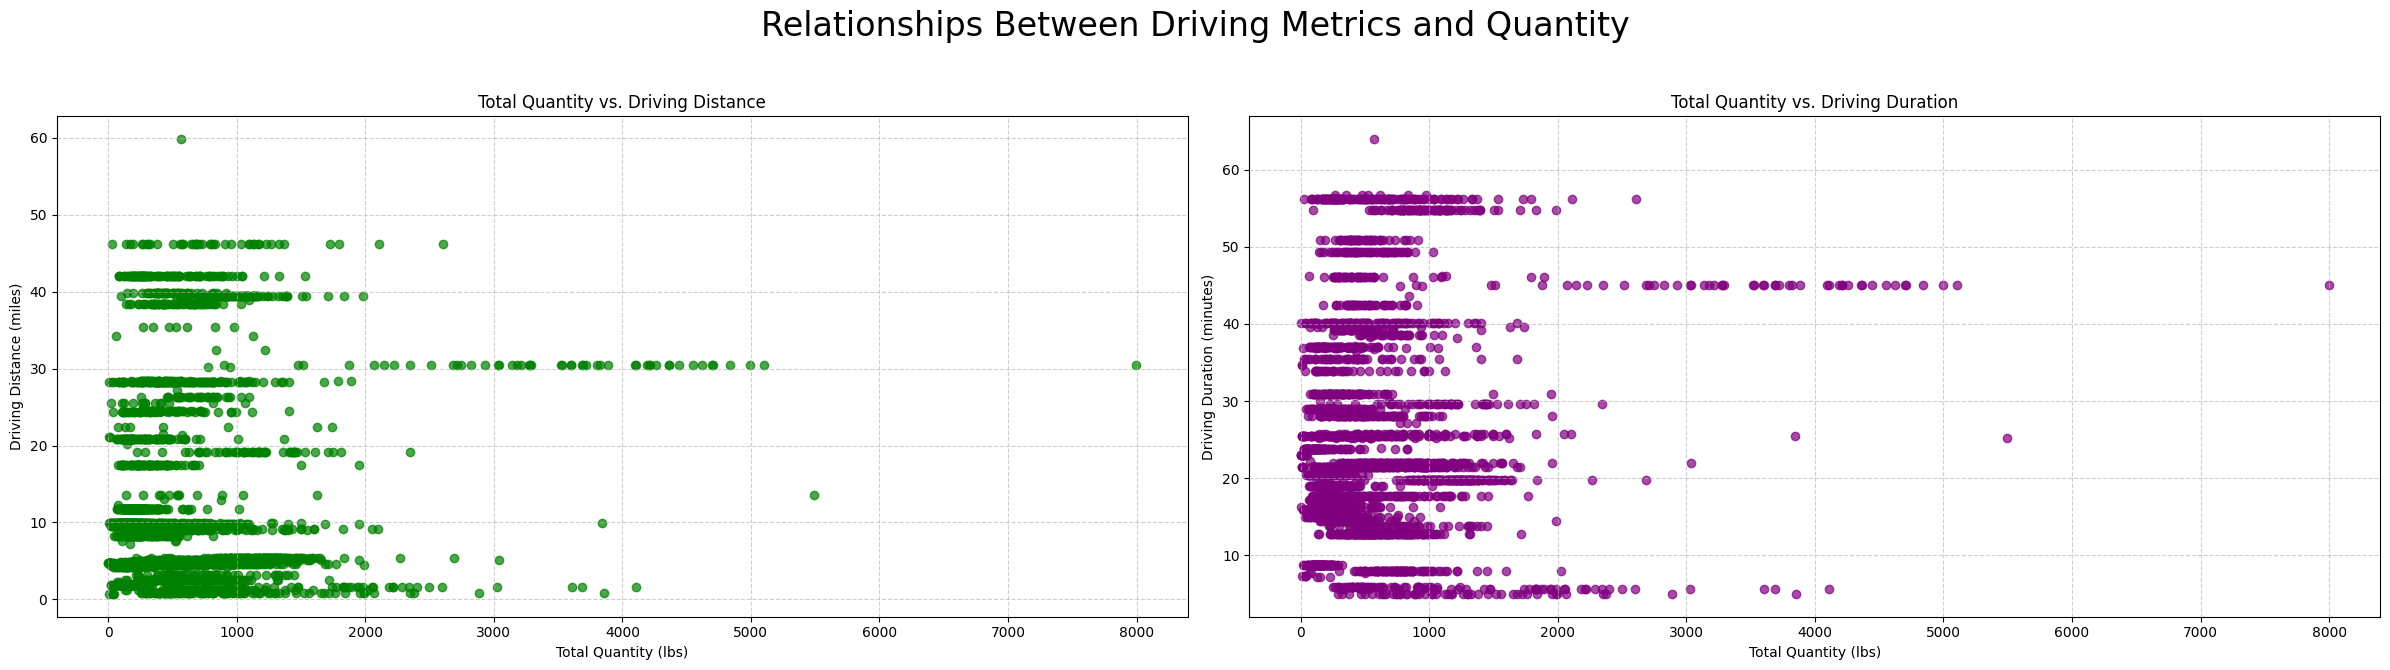

In [51]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 7))
fig.suptitle('Relationships Between Driving Metrics and Quantity', fontsize=24)

# --- Scatter Plot 1: Total Quantity vs. Driving Distance ---
axes[0].scatter(per_pickup_with_labor_in_per_pound['Total Quantity (lbs)'], per_pickup_with_labor_in_per_pound['Driving Distance (miles)'], alpha=0.7, color='green')
axes[0].set_xlabel('Total Quantity (lbs)')
axes[0].set_ylabel('Driving Distance (miles)')
axes[0].set_title('Total Quantity vs. Driving Distance')
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Scatter Plot 2: Total Quantity vs. Driving Duration ---
axes[1].scatter(per_pickup_with_labor_in_per_pound['Total Quantity (lbs)'], per_pickup_with_labor_in_per_pound['Driving Duration (minutes)'], alpha=0.7, color='purple')
axes[1].set_xlabel('Total Quantity (lbs)')
axes[1].set_ylabel('Driving Duration (minutes)')
axes[1].set_title('Total Quantity vs. Driving Duration')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#**Export Results!**

In [52]:
per_pickup_with_labor_in_per_pound.to_csv('Cost-per-Pickup-and-Pound.csv', index=False)

In [53]:
grouped_cost_per_pound_with_labor_df.to_csv('Cost-per-Pickup-and-Pound-per-agency.csv', index=False)